In [1]:
import os
import numpy as np
import pandas as pd

data_path = os.path.abspath('./data/train.csv')
df= pd.read_csv(data_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Survived')

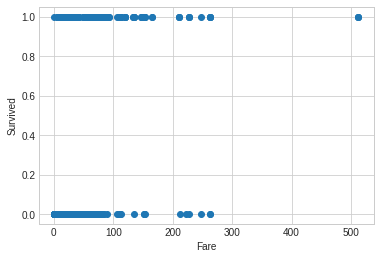

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = df['Fare']
y = df['Survived']
# sizes = 200*df_encoded['bruises']
# plt.scatter(x, y, c = label_encoded, s=sizes, alpha=0.5, cmap='Accent')
plt.scatter(x, y )
plt.xlabel('Fare')
plt.ylabel('Survived')

The graph does not show a clear correlation between survived and Fare

In [3]:
print(df.shape)
df.isna().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset lacks a considerable amount of data associated with Cabin location, a factor that it's probably important for the model. This missing values of Cabin's location might be infered by looking at the fare and pclass

In [4]:
sub_set = df.loc[:,('Survived','Pclass','SibSp','Parch','Fare','Cabin')] 
sub_set['Cabin'].fillna(value='nbk', inplace=True)
sub_set

,Survived,Pclass,SibSp,Parch,Fare,Cabin
0,0,3,1,0,7.2500,nbk
1,1,1,1,0,71.2833,C85
2,1,3,0,0,7.9250,nbk
3,1,1,1,0,53.1000,C123
4,0,3,0,0,8.0500,nbk
...,...,...,...,...,...,...
886,0,2,0,0,13.0000,nbk
887,1,1,0,0,30.0000,B42
888,0,3,1,2,23.4500,nbk
889,1,1,0,0,30.0000,C148


In [5]:
first_class = sub_set[sub_set.Pclass == 1]

print(first_class.Cabin.isna().sum())
first_class[first_class.Cabin != 'nbk']

### nbk: no body knows


0


,Survived,Pclass,SibSp,Parch,Fare,Cabin
1,1,1,1,0,71.2833,C85
3,1,1,1,0,53.1000,C123
6,0,1,0,0,51.8625,E46
11,1,1,0,0,26.5500,C103
23,1,1,0,0,35.5000,A6
...,...,...,...,...,...,...
871,1,1,1,1,52.5542,D35
872,0,1,0,0,5.0000,B51 B53 B55
879,1,1,0,1,83.1583,C50
887,1,1,0,0,30.0000,B42


In [6]:
second_class = sub_set[sub_set.Pclass == 2]

print(second_class.Cabin.isna().sum())
second_class[second_class.Cabin != 'nbk']





0


,Survived,Pclass,SibSp,Parch,Fare,Cabin
21,1,2,0,0,13.0000,D56
66,1,2,0,0,10.5000,F33
123,1,2,0,0,13.0000,E101
148,0,2,0,2,26.0000,F2
183,1,2,2,1,39.0000,F4
193,1,2,1,1,26.0000,F2
292,0,2,0,0,12.8750,D
303,1,2,0,0,12.3500,E101
327,1,2,0,0,13.0000,D
340,1,2,1,1,26.0000,F2


In [7]:
third_class = sub_set[sub_set.Pclass == 3]
print(third_class.Cabin.isna().sum())
third_class[third_class.Cabin != 'nbk']

0


,Survived,Pclass,SibSp,Parch,Fare,Cabin
10,1,3,1,1,16.7000,G6
75,0,3,0,0,7.6500,F G73
128,1,3,1,1,22.3583,F E69
205,0,3,0,1,10.4625,G6
251,0,3,1,1,10.4625,G6
394,1,3,0,2,16.7000,G6
429,1,3,0,0,8.0500,E10
699,0,3,0,0,7.6500,F G63
715,0,3,0,0,7.6500,F G73
751,1,3,0,1,12.4750,E121


#### Prediction of Cabin's location using Pclass and Fare as Features

In [16]:
# Classificator: KNN

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


#Encoding:
le = preprocessing.LabelEncoder()
cabin_encoded = le.fit_transform(sub_set.Cabin)

features = sub_set.drop(['Survived','Cabin'], axis=1)
label = cabin_encoded

#Zip data:

# features = list(zip(features.Pclass, features.Fare,))
features = list(zip(features.Pclass, features.SibSp, features.Parch,features.Fare))


#Splitting data:

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 4)

# Generating model:

neighbors = 1
knn= KNeighborsClassifier(neighbors)

### Training model:

knn.fit(X_train, y_train)

# Prediction:

y_pred = knn.predict(X_test)

# Accuracy:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.8324022346368715


Thanks to this model, a prediction of the missing values for the cabins has been found.  Now, the predicted cabins can be used to fill the NaN cabin values of the original dataset